In [21]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [7]:
songs_features = pd.read_pickle('/Users/damiencombe/Desktop/IH-Labs/Project files/songs_features.pkl')

In [9]:
songs_features = songs_features.drop(columns=['id'])

In [10]:
songs_features

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,audio_features,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,audio_features,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,audio_features,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,audio_features,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,audio_features,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10925,Into The Valley,Skids,2QSD3K3b3BJ8DPhGhQfDPW,0.332,0.707,7,-12.698,1,0.0361,0.000012,0.006120,0.1100,0.652,144.815,audio_features,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,https://api.spotify.com/v1/tracks/2QSD3K3b3BJ8...,https://api.spotify.com/v1/audio-analysis/2QSD...,199467,4
10926,Tonight's Da Night,Redman,49XnDVsYOHgV4gFZeCojKj,0.464,0.749,6,-8.564,1,0.4800,0.224000,0.000046,0.3510,0.879,181.121,audio_features,spotify:track:49XnDVsYOHgV4gFZeCojKj,https://api.spotify.com/v1/tracks/49XnDVsYOHgV...,https://api.spotify.com/v1/audio-analysis/49Xn...,201800,4
10927,Figure 8,FKA twigs,5Y9IIH8Xmo1nuk0gfFjc4Q,0.694,0.710,2,-9.793,1,0.3400,0.527000,0.001350,0.0697,0.415,119.964,audio_features,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q,https://api.spotify.com/v1/tracks/5Y9IIH8Xmo1n...,https://api.spotify.com/v1/audio-analysis/5Y9I...,183040,4
10928,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.332,0.800,1,-9.746,1,0.0326,0.000368,0.001600,0.0850,0.832,149.240,audio_features,spotify:track:0ya0JYEFoXNviB8RMeHDtW,https://api.spotify.com/v1/tracks/0ya0JYEFoXNv...,https://api.spotify.com/v1/audio-analysis/0ya0...,222160,4


In [11]:
songs_features['time_signature'].value_counts()

4    10104
3      691
5       79
1       56
Name: time_signature, dtype: int64

In [12]:
X = songs_features[['danceability','energy', 'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]



In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_prep = scaler.fit_transform(X)

In [37]:
pd.DataFrame(X_prep,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.536359,0.454059,-1.493586,0.600576,0.662650,-0.538416,1.310034,-0.437900,-0.010102,-0.076131,-0.921855,0.886643,0.213747
1,-0.518660,1.064953,-1.212983,0.033309,0.662650,-0.327322,-0.939207,-0.369626,-0.339697,0.780322,-0.149777,0.352103,0.213747
2,-1.232519,-0.681689,-0.371176,-1.298007,-1.509093,-0.108948,-0.046918,-0.437454,4.727029,-1.634059,1.510341,0.635922,0.213747
3,-1.031930,-0.870980,-1.212983,-0.461106,0.662650,-0.457133,-0.686316,-0.437793,-0.655722,-0.997837,0.449324,-0.285313,0.213747
4,-0.323971,0.604631,1.312439,-0.439587,0.662650,0.182216,1.322342,-0.437639,0.817119,1.600070,1.625229,-0.739084,0.213747


### We frist try to find the best k number with the elbow method

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

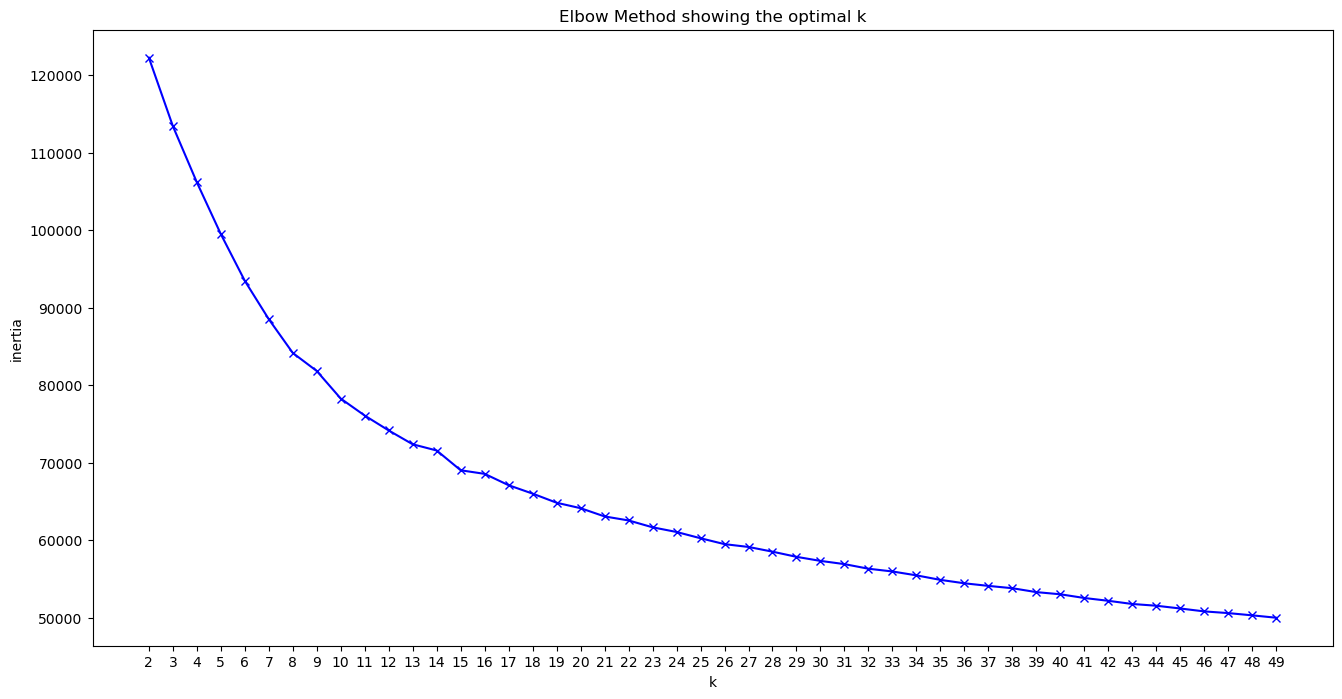

In [53]:
import numpy as np
K = range(2, 50)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### This method is not very conclusive, we can't see a proper elbow so we try the silouhette score

In [ ]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

We can see that 4,5 and 8 are slighly close. We can try with a higher to be sure that there will not be a better result.

In [ ]:
from sklearn.metrics import silhouette_score
K = range(2, 50)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

There's no better result. We will try with 4,5 and 8.

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [58]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0     950
1    1881
2    2743
3     151
4    1880
5    1843
6     826
7     656
dtype: int64

In [63]:
clustered_features = pd.concat([songs_features, clusters], axis=1)

In [64]:
clustered_features

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,0
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,audio_features,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,2
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,audio_features,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,2
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,audio_features,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,audio_features,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,audio_features,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10925,Into The Valley,Skids,2QSD3K3b3BJ8DPhGhQfDPW,0.332,0.707,7,-12.698,1,0.0361,0.000012,0.006120,0.1100,0.652,144.815,audio_features,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,https://api.spotify.com/v1/tracks/2QSD3K3b3BJ8...,https://api.spotify.com/v1/audio-analysis/2QSD...,199467,4,4
10926,Tonight's Da Night,Redman,49XnDVsYOHgV4gFZeCojKj,0.464,0.749,6,-8.564,1,0.4800,0.224000,0.000046,0.3510,0.879,181.121,audio_features,spotify:track:49XnDVsYOHgV4gFZeCojKj,https://api.spotify.com/v1/tracks/49XnDVsYOHgV...,https://api.spotify.com/v1/audio-analysis/49Xn...,201800,4,6
10927,Figure 8,FKA twigs,5Y9IIH8Xmo1nuk0gfFjc4Q,0.694,0.710,2,-9.793,1,0.3400,0.527000,0.001350,0.0697,0.415,119.964,audio_features,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q,https://api.spotify.com/v1/tracks/5Y9IIH8Xmo1n...,https://api.spotify.com/v1/audio-analysis/5Y9I...,183040,4,6
10928,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.332,0.800,1,-9.746,1,0.0326,0.000368,0.001600,0.0850,0.832,149.240,audio_features,spotify:track:0ya0JYEFoXNviB8RMeHDtW,https://api.spotify.com/v1/tracks/0ya0JYEFoXNv...,https://api.spotify.com/v1/audio-analysis/0ya0...,222160,4,4


In [44]:
clustered_features = clustered_features.rename(columns={0:'cluster'})

In [45]:
clustered_features

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,audio_features,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,2
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,audio_features,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,2
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,audio_features,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,audio_features,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,audio_features,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10925,Into The Valley,Skids,2QSD3K3b3BJ8DPhGhQfDPW,0.332,0.707,7,-12.698,1,0.0361,0.000012,0.006120,0.1100,0.652,144.815,audio_features,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,https://api.spotify.com/v1/tracks/2QSD3K3b3BJ8...,https://api.spotify.com/v1/audio-analysis/2QSD...,199467,4,4
10926,Tonight's Da Night,Redman,49XnDVsYOHgV4gFZeCojKj,0.464,0.749,6,-8.564,1,0.4800,0.224000,0.000046,0.3510,0.879,181.121,audio_features,spotify:track:49XnDVsYOHgV4gFZeCojKj,https://api.spotify.com/v1/tracks/49XnDVsYOHgV...,https://api.spotify.com/v1/audio-analysis/49Xn...,201800,4,6
10927,Figure 8,FKA twigs,5Y9IIH8Xmo1nuk0gfFjc4Q,0.694,0.710,2,-9.793,1,0.3400,0.527000,0.001350,0.0697,0.415,119.964,audio_features,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q,https://api.spotify.com/v1/tracks/5Y9IIH8Xmo1n...,https://api.spotify.com/v1/audio-analysis/5Y9I...,183040,4,6
10928,Like An Angel,The Mighty Lemon Drops,0ya0JYEFoXNviB8RMeHDtW,0.332,0.800,1,-9.746,1,0.0326,0.000368,0.001600,0.0850,0.832,149.240,audio_features,spotify:track:0ya0JYEFoXNviB8RMeHDtW,https://api.spotify.com/v1/tracks/0ya0JYEFoXNv...,https://api.spotify.com/v1/audio-analysis/0ya0...,222160,4,4


In [49]:
clustered_features.to_pickle('clustered_features.pkl')

In [47]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))

In [48]:
pickle.dump(kmeans,open('kmeans_5.sav','wb'))